In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [12]:
fromage=pd.read_table("C:\\Users\\ghadir\\OneDrive - Lebanese University\\semester 6\\I3344 numerical simulation and modelling\\datasets\\fromage.txt",index_col=0)
fromage.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


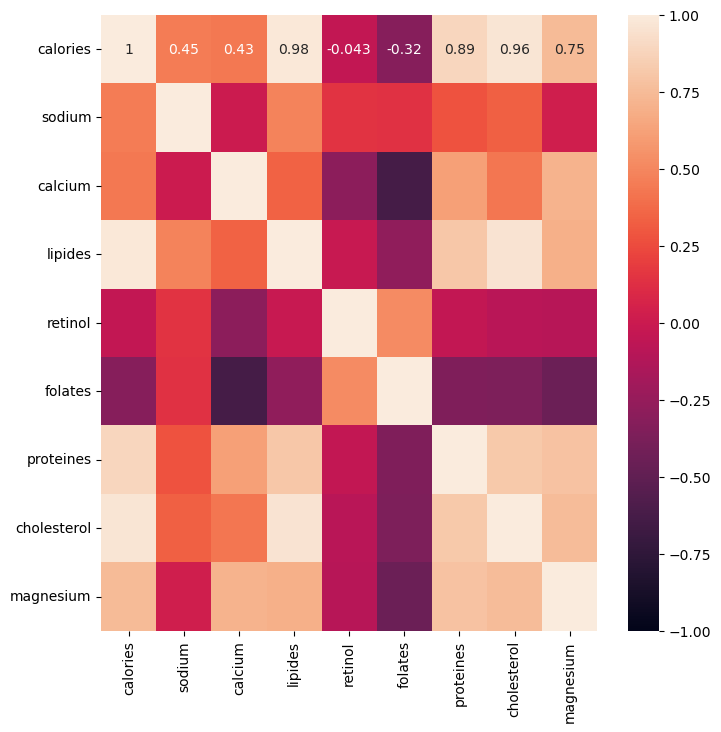

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(8,8))
h1=sns.heatmap(fromage.corr(), annot=True , ax=ax , vmin=-1 , vmax=1)

In [14]:
fromage.shape

(29, 9)

In [24]:
X=fromage.drop(["calories"],axis=1)
X.head()

,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,
CarredelEst,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,314.0,215.9,19.5,103.0,36.4,23.4,60,20


In [27]:
y=fromage.calories
y.head()

Fromages
CarredelEst    314
Babybel        314
Beaufort       401
Bleu           342
Camembert      264
Name: calories, dtype: int64

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [30]:
X_train.shape , X_test.shape

((20, 8), (9, 8))

In [35]:
scaler=StandardScaler()
#normalization centre reduite for the training dataset-->calcul the mean and std of each column in the training and apply the transformatiom(data-mean/std) to the values of the training dataset
#mnhotton again bi df laeno l fit_transfrom return a numpy array-->shaklon mesh helo fa mnhotton in df
X_train_CR=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)

In [36]:
X_train_CR.head()

,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,-0.633340,-1.646861,-0.574613,2.915299,1.366103,-1.210300,-0.734586,-0.993131
1,-1.755716,-0.626595,-2.404590,-0.814176,0.441072,-1.615179,-2.192822,-1.463809
2,-0.746521,1.121042,0.181778,-0.231561,-0.778288,0.756257,0.359090,1.642667
3,0.790850,0.628261,0.718571,-0.936636,-0.938066,0.134478,0.723649,1.266124
4,0.102334,0.254858,0.230577,-0.305780,-0.702603,0.452597,-0.005468,0.042361


In [37]:
#normalization centre reduite for the testing dataset-->only apply the trasnformation on the testing dataset without computing the means and the std's it takes the means and std's calculated for the training dataset
X_test_CR=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [39]:
X_test_CR.head()

,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,-0.821975,0.368684,0.742971,-0.843863,-0.929657,-0.270402,0.359090,0.324768
1,-1.906624,-1.341475,-1.879997,-0.283514,0.659716,-1.803159,-1.463704,-1.557945
2,-1.576513,1.620764,0.755171,-0.580388,-1.038979,1.435875,1.452767,1.736802
3,0.045744,-0.174070,0.584373,-0.758512,-0.668966,0.423677,0.723649,-0.145910
4,-0.520160,-0.126874,1.133366,0.165507,-0.828744,0.944236,1.452767,0.136497


In [41]:
#normal linear regression --> calories=equation in function of the explicatives variables
linear_model=LinearRegression()
linear_model.fit(X_train_CR,y_train)
predictions=linear_model.predict(X_test_CR)
predictions

array([328.32822851, 115.56392955, 381.71161079, 343.32390581,
       391.06480538, 416.70146788, 298.70663555, 325.91085251,
       332.42681253])

#### --->note:nehna ma mnjib l RMSE(performance)ella aal test bas hon nehna aam njiba aal train kmn bas kermel nshouf eza fi overffiting aw laa mesh aktar yaani bas la hek mnjiba 

In [42]:
print("RMSE train set:",mean_squared_error(y_train,linear_model.predict(X_train_CR),squared=False))
print("RMSE test set:",mean_squared_error(y_test,predictions,squared=False)

RMSE train set: 6.813676483453557
RMSE test set: 10.617822685887049


### overfitting because RMSE in train is toooo small than from the train 

#### -->note:3melet regression linear normal rje3et bde a3mal polynomial bas lahazet enu l variables ktar fa elet lezem a3mal lasso la a3mal elimination lal features li ma mohemin w ma bi asro aal model ===> mn khilel l heatmap ===> variables li ma fi baynon correlation linear (awal shi jarrabet kaza value lal alpha w rje3et na2et l best one lama RMSE l values erab mn baeed aal train w aal test w taba2et lasso aalayha ) w byerja3 3melna l polynomial w sar 3enna 44 variable ta2riban yaani kter ktar fa berja3 baamal regression linear normal between all the variables w byerja3 lasso 

## note:if squared=True ---> MSE 

In [43]:
alpha_values=[0,1,2,3,4,5,6,7,8,9,10]
for alpha in alpha_values:
    lasso_model=Lasso(alpha=alpha)
    lasso_model.fit(X_train_CR,y_train)
    print("alpha=",alpha)
    print("RMSE train set:",mean_squared_error(y_train,lasso_model.predict(X_train_CR),squared=False))
    print("RMSE test set:",mean_squared_error(y_test,lasso_model.predict(X_test_CR),squared=False)

C:\Users\ghadir\AppData\Local\Temp\ipykernel_6204\1718149647.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(X_train_CR,y_train)
C:\Users\ghadir\miniconda3\envs\I3344\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


alpha= 0
RMSE train set: 6.813676483453558
RMSE test set: 10.617822685886246
alpha= 1
RMSE train set: 7.25945182964364
RMSE test set: 9.572887414973348
alpha= 2
RMSE train set: 7.748739950341903
RMSE test set: 9.525944642183877
alpha= 3
RMSE train set: 8.142008335645645
RMSE test set: 9.50237776485513
alpha= 4
RMSE train set: 8.643151795688345
RMSE test set: 9.592899842007053
alpha= 5
RMSE train set: 9.247716424987313
RMSE test set: 9.822628430311783
alpha= 6
RMSE train set: 9.936841113460378
RMSE test set: 10.182221905326386
alpha= 7
RMSE train set: 10.694272591741338
RMSE test set: 10.658218628081427
alpha= 8
RMSE train set: 11.477219150073893
RMSE test set: 11.299549094322394
alpha= 9
RMSE train set: 12.290219607051926
RMSE test set: 12.043738629664444
alpha= 10
RMSE train set: 13.13937535206206
RMSE test set: 12.845349801777978


C:\Users\ghadir\miniconda3\envs\I3344\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.643e+02, tolerance: 1.689e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


### we choose the alpha=5 (to apply it on lasso) its good on the testing and training at the same time (so close to each other)

In [44]:
lasso_model=Lasso(alpha=5)
lasso_model.fit(X_train_CR,y_train)

Lasso(alpha=5)

In [45]:
lasso_model.coef_

array([ 0.        ,  0.        , 60.87877379, -0.        , -0.        ,
       18.53230887,  9.76086084,  1.01802339])

In [46]:
#calculate the pourcentage of the RMSE(error)-->aal test hay
# %error=(MRSE aal test/mean lal y_test)*100
print("the before pourcentage RMSE test set:",(mean_squared_error(y_test,lasso_model.predict(X_test_CR),squared=False)/y_test.mean())*100)

the pourcentage RMSE test set: 3.03897063846016


In [62]:
polynomial=PolynomialFeatures(degree=2,include_bias=False,interaction_only=False)
#bizido l columns kter 
X_train_CR_poly=polynomial.fit_transform(X_train_CR)#returns a numpy array in X_train_CR_poly
polynomial.get_feature_names_out()
#X_train_CR_poly

array(['sodium', 'calcium', 'lipides', 'retinol', 'folates', 'proteines',
       'cholesterol', 'magnesium', 'sodium^2', 'sodium calcium',
       'sodium lipides', 'sodium retinol', 'sodium folates',
       'sodium proteines', 'sodium cholesterol', 'sodium magnesium',
       'calcium^2', 'calcium lipides', 'calcium retinol',
       'calcium folates', 'calcium proteines', 'calcium cholesterol',
       'calcium magnesium', 'lipides^2', 'lipides retinol',
       'lipides folates', 'lipides proteines', 'lipides cholesterol',
       'lipides magnesium', 'retinol^2', 'retinol folates',
       'retinol proteines', 'retinol cholesterol', 'retinol magnesium',
       'folates^2', 'folates proteines', 'folates cholesterol',
       'folates magnesium', 'proteines^2', 'proteines cholesterol',
       'proteines magnesium', 'cholesterol^2', 'cholesterol magnesium',
       'magnesium^2'], dtype=object)

In [49]:
pd.DataFrame(X_train_CR_poly,columns=polynomial.get_feature_names_out()).head()

,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium,sodium^2,sodium calcium,...,folates^2,folates proteines,folates cholesterol,folates magnesium,proteines^2,proteines cholesterol,proteines magnesium,cholesterol^2,cholesterol magnesium,magnesium^2
0,-0.633340,-1.646861,-0.574613,2.915299,1.366103,-1.210300,-0.734586,-0.993131,0.401120,1.043023,...,1.866238,-1.653395,-1.003521,-1.356719,1.464826,0.889069,1.201986,0.539617,0.729540,0.986309
1,-1.755716,-0.626595,-2.404590,-0.814176,0.441072,-1.615179,-2.192822,-1.463809,3.082538,1.100124,...,0.194544,-0.712410,-0.967192,-0.645645,2.608804,3.541800,2.364314,4.808467,3.209872,2.142737
2,-0.746521,1.121042,0.181778,-0.231561,-0.778288,0.756257,0.359090,1.642667,0.557294,-0.836882,...,0.605732,-0.588585,-0.279476,-1.278468,0.571924,0.271565,1.242278,0.128946,0.589866,2.698354
3,0.790850,0.628261,0.718571,-0.936636,-0.938066,0.134478,0.723649,1.266124,0.625444,0.496861,...,0.879968,-0.126149,-0.678831,-1.187708,0.018084,0.097315,0.170266,0.523668,0.916230,1.603071
4,0.102334,0.254858,0.230577,-0.305780,-0.702603,0.452597,-0.005468,0.042361,0.010472,0.026081,...,0.493652,-0.317996,0.003842,-0.029763,0.204844,-0.002475,0.019172,0.000030,-0.000232,0.001794


In [50]:
linear_pol_model=LinearRegression()
linear_pol_model.fit(X_train_CR_poly,y_train)

LinearRegression()

In [51]:
linear_pol_model.coef_
#ma bisafro l coef hon aashen regression linear

array([  7.82350851, -11.46657597,  26.93750829,  -9.58478846,
        -6.31115646,  20.6850221 ,  23.6165589 ,  14.33049555,
        -7.98653688,   7.9955212 ,  -0.47673546,   1.29627559,
         0.39182288,  -1.51420232,  15.6656373 , -18.6719031 ,
        -0.74577899,   6.39157126,  -3.28134756,  -3.74635806,
        -4.37320126,   6.41346967,   4.81860203,  -3.80029784,
        -4.19031648,  -5.32675328,  -6.18877123,   8.32915986,
       -13.08600448,  -3.45986727,   8.22431538,   8.05699525,
        -7.38837766,   4.48594281,   4.30717251,  -4.58200182,
        -0.45486706,  10.75563509,   5.72412092,  -7.69444215,
         5.36529093,  13.87930272, -14.7008514 ,  -3.79329476])

In [52]:
#3melna metel X_train_CR w hawalna l test dataset metla(square lal features,combinations,...)
X_test_CR_poly=polynomial.transform(X_test_CR)
#predictions lal new values
y_pred=linear_pol_model.predict(X_test_CR_poly)

In [55]:
print("the pourcentage RMSE test set:",(mean_squared_error(y_test,y_pred,squared=False)/y_test.mean())*100)

the pourcentage RMSE test set: 5.086597948277636


In [56]:
lasso_pol_model=Lasso(alpha=5,fit_intercept=True)
lasso_pol_model.fit(X_train_CR_poly,y_train)

Lasso(alpha=5)

In [57]:
lasso_pol_model.coef_
#returns a numpy array 

array([ 0.        ,  0.        , 55.59665384, -0.        , -0.        ,
       15.49110473, 12.5312011 ,  2.19587407, -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -2.63920303, -0.        ,
        0.        , -0.        , -0.        , -0.        , -1.80300094,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ])

In [59]:
y_pred = lasso_pol_model.predict(X_test_CR_poly)
print("the after pourcentage RMSE test set:",(mean_squared_error(y_test,y_pred,squared=False)/y_test.mean())*100)

the after pourcentage RMSE test set: 3.39302840752831


In [60]:
#we put in the df coef the numpy array lasso_pol_model.coef_ and we set the column name:coef and the names of features as index
coef=pd.DataFrame(lasso_pol_model.coef_,columns=["coef"],index=polynomial.get_feature_names_out())
coef.loc["Intercept"]=lasso_pol_model.intercept_#intercept at the end of the df
coef
#return equation of the variable cible en function des variables explicatives

,coef
sodium,0.000000
calcium,0.000000
lipides,55.596654
retinol,-0.000000
folates,-0.000000
proteines,15.491105
cholesterol,12.531201
magnesium,2.195874
sodium^2,-0.000000
sodium calcium,-0.000000
